## Prediction of optimum no. of clusters for Iris Dataset using Unsupervised ML

## Importing Libraries

In [1]:
# Importing the libraries which are used throughout the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Loading Iris Dataset

In [2]:
# Load the iris dataset from sklearn package and visualising first 5 rows
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Scaling the data

In [3]:
# Scaling the data for better fitting
iris_scaled = StandardScaler().fit_transform(iris_df)

## Finding optimum number of clusters

In [4]:
# Calculate the sum of squared distances for different values of k
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(iris_scaled)
    distortions.append(kmeans.inertia_)

## Visualising the elbow method

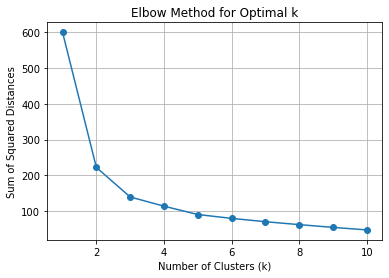

In [5]:
# Plot the elbow curve to find best no. of clusters
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid()
plt.show()

k = 3, 3 Clusters are good for this dataset. At k = 3, the graph plot starts to "knee".

## Training K-means model

In [6]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 350, n_init = 12, random_state = 42)
iris_kmeans = kmeans.fit_predict(iris_scaled)

## Final Results Visualization

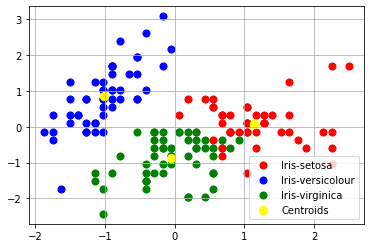

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(iris_scaled[iris_kmeans == 0, 0], iris_scaled[iris_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_scaled[iris_kmeans == 1, 0], iris_scaled[iris_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_scaled[iris_kmeans == 2, 0], iris_scaled[iris_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 70, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()